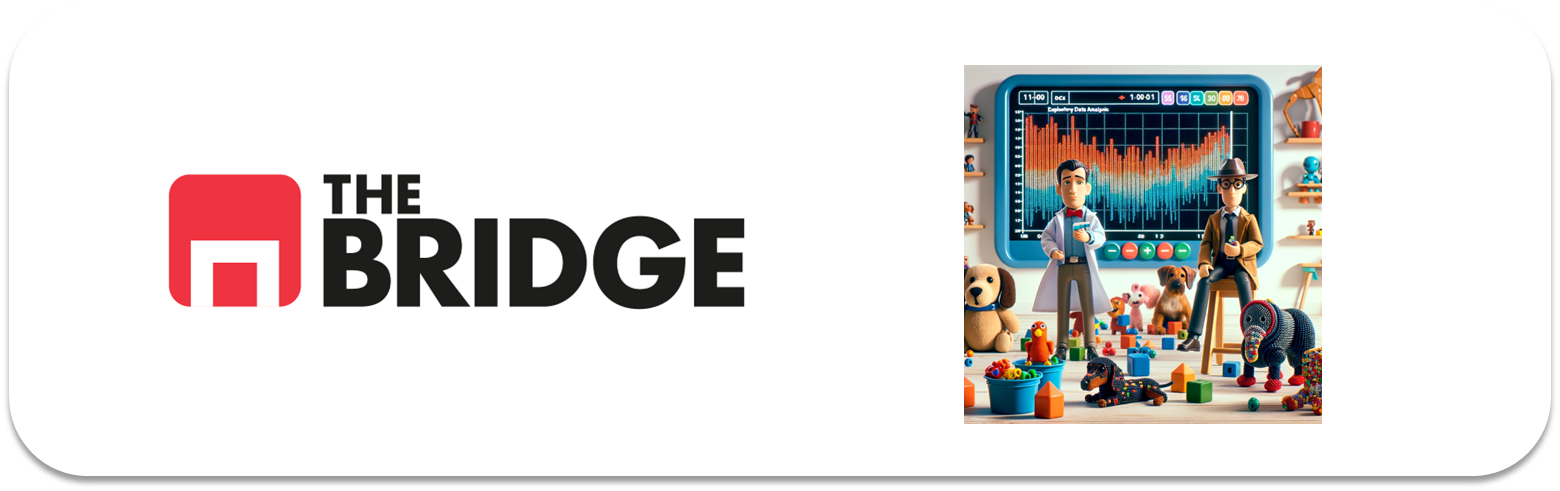

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene



## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
df_titanic_2 = df_titanic.copy()
df_titanic_2.drop(columns= ["deck", "survived", "pclass", "embarked"], inplace=True)
df_titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [7]:
df_titanic_2["family_members"] = df_titanic_2["parch"] + df_titanic_2["sibsp"]
df_titanic_2["family_members"].head(20)

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
15    0
16    5
17    0
18    1
19    0
Name: family_members, dtype: int64

In [ ]:
df_titanic_2.info() # aqui sale mi columna nueva

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     889 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


In [9]:
# borramos columna parch y sibsp:
df_titanic_2.drop(columns= ["parch", "sibsp"], inplace=True)
df_titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
# para embark_town usaremos la moda:
df_titanic_2["embark_town"].mode() # saco la moda
# luego sustituyo los nulos por la moda:
df_titanic_2.loc[df_titanic_2["embark_town"].isna(), "embark_town"] = df_titanic_2["embark_town"].mode()[0]
# y con el [0] otra vez nos quedamos con el primer valor
df_titanic_2.info() # aqui vemos que ya no hay nulos en embark_town:
# ni hay nulos en nada más!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [11]:
df_titanic_2["age"].mean() # saco la media
# la sustituyo por los valores nulos que hay:
df_titanic_2.loc[df_titanic_2["age"].isna(), "age"] = int(df_titanic_2["age"].mean())
df_titanic_2["age"] = df_titanic_2["age"].astype(int) # cambio el float a int
df_titanic_2.info() # confirmo que está todo ok


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    int64  
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 57.6+ KB


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

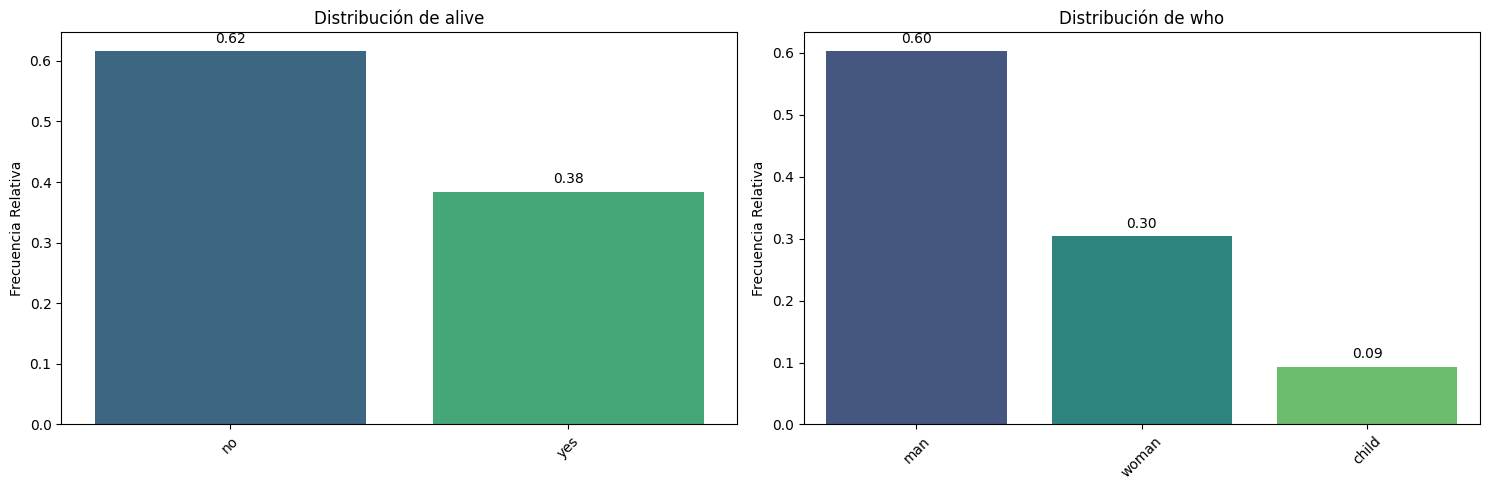

In [13]:
# 1: vamos a analizar la variante alive con who:
# vemos primero sus frecuencias absolutas por separado:
pinta_distribucion_categoricas(df_titanic_2,["alive","who"], relativa= True, mostrar_valores= True)



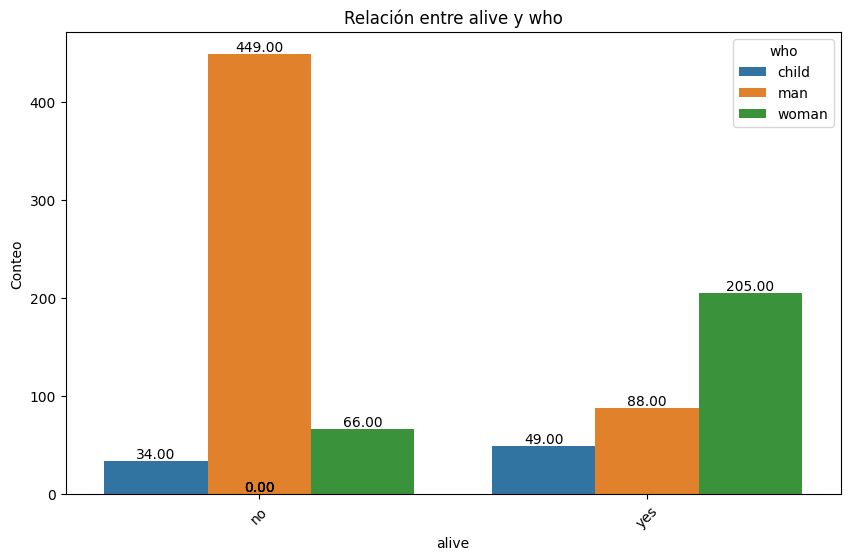

In [ ]:
# ahora valoramos sus frecuencias absolutas juntas:
plot_categorical_relationship_fin(df_titanic_2, "alive","who", show_values= True)

#### ¿Sobrevivieron más hombres, mujeres o niños? ####

Sobrevivieron más mujeres: 205; seguida por hombres: 88; y niños, que sobrevivieron 49.


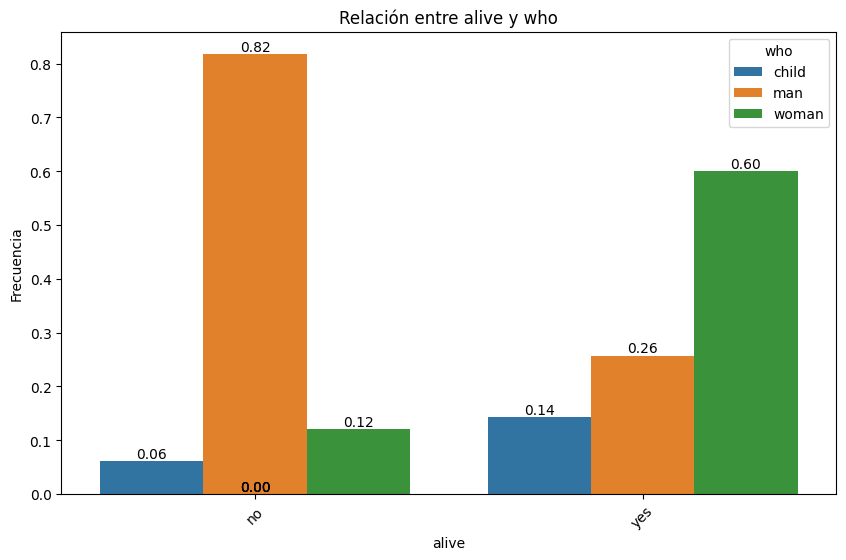

In [15]:
# Veamos sus frecuencias relativas juntas:
plot_categorical_relationship_fin(df_titanic_2, "alive","who", relative_freq = True, show_values = True)

#### ¿Y en términos relativos es igual? ####
Sí, sobrevivieron un 60% de mujeres, frente al 26% de hombres, y un 14% de niños. Aquí es más claro quién sobrevivió en mayor porcentaje, aunque en las frecuencias absolutas se veía igual de claro, y los 3 valores de mujeres, hombres y niños coinciden.

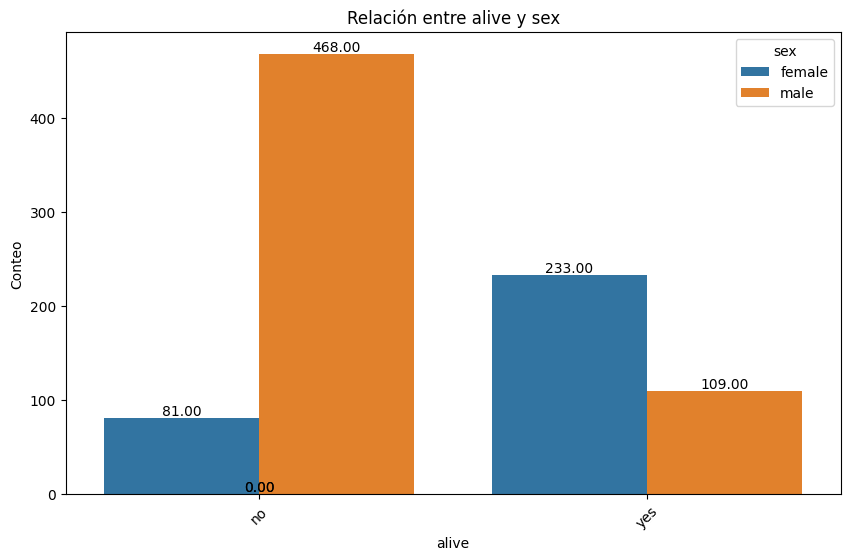

In [16]:
# Vamos a ver la frecuencia absoluta entre las variables alive y sex:
plot_categorical_relationship_fin(df_titanic_2, "alive","sex", show_values= True)


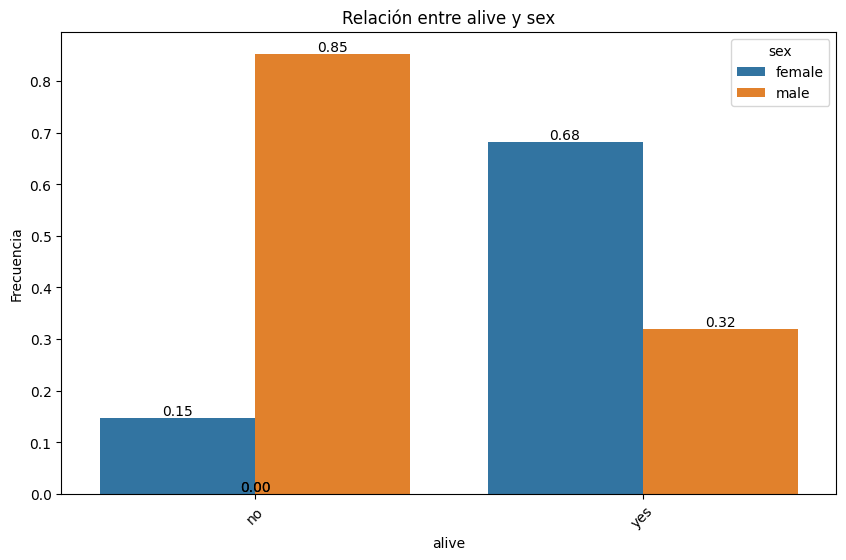

In [17]:
# y su frecuencia relativa:
plot_categorical_relationship_fin(df_titanic_2, "alive","sex", relative_freq = True, show_values = True)

#### ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ####
Sí, el 68% de mujeres sobrevivieron frente al 32% de los hombres. Más del doble de mujeres sobrevivieron, que de hombres(233 mujeres frente a 109 hombres).

Igual que para la mortalidad, el 85% de hombres murieron frente al 15% de mujeres.Esto es, 468 hombres en comparación a 81 mujeres.

#### ¿Y entre ser adulto o ser niño? #### 

Sí, como vimos con la frecuencia relativa de aquí debajo, sobrevivieron un 86% de adultos (un total de 293) frente al 14% de niños (un total de 49).

En cuanto a los fallecidos, un 94% eran adultos (515 personas), frente al 6% de niños (34 niños)



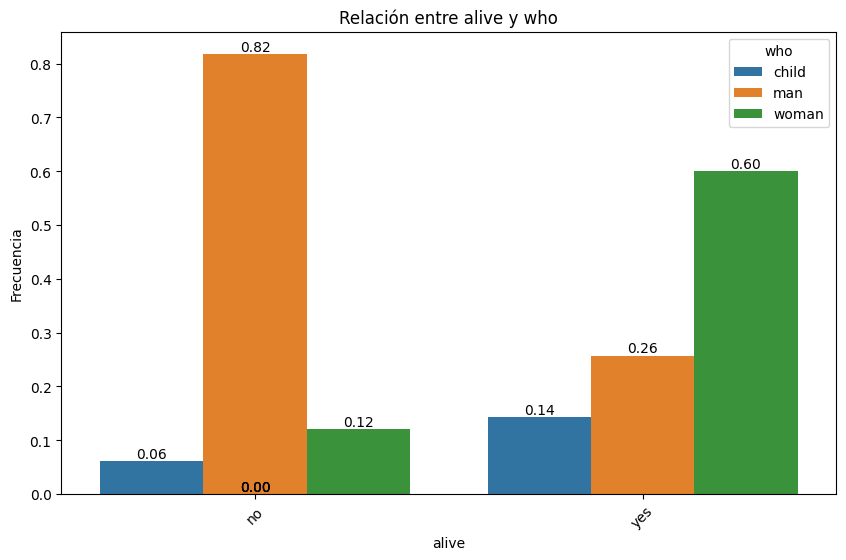

In [18]:
plot_categorical_relationship_fin(df_titanic_2, "alive","who", relative_freq = True, show_values = True)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?
- Sobrevivieron más personas de la primera clase (136 personas)

¿ Y en términos relativos? 
- Similar a las frecuencias absolutas, un 40% de primera clase.

¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
- No, ya que la primera y tercera clase son similares. Sobrevivieron 136 personas de 1ª clase, y 119 personas de 3ª clase, seguidos de 87 personas de la 2ª clase. En cuanto a supervivencia, no hay una relación directa con la clase, pues se entendería que de ser así, habrían sobrevivido muchas más personas de la 1ª clase. 

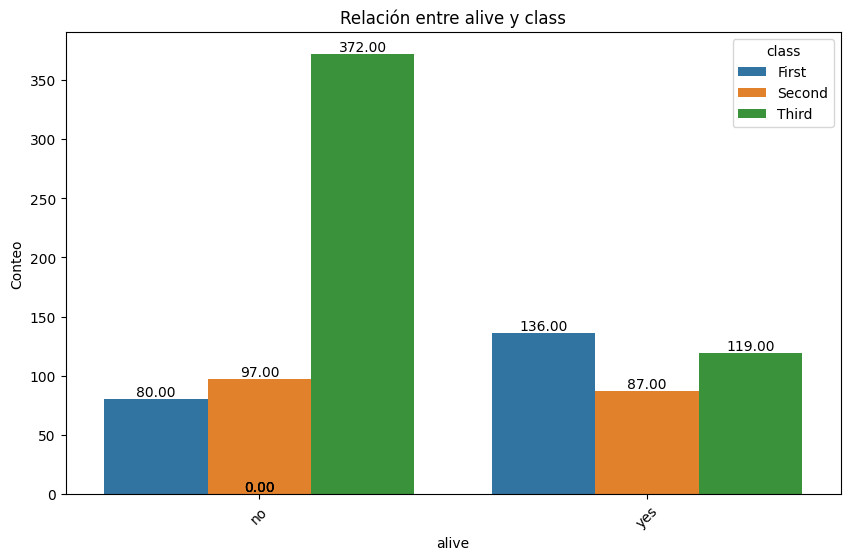

In [ ]:
# valores absolutos entre alive y class:
plot_categorical_relationship_fin(df_titanic_2, "alive","class", show_values= True)

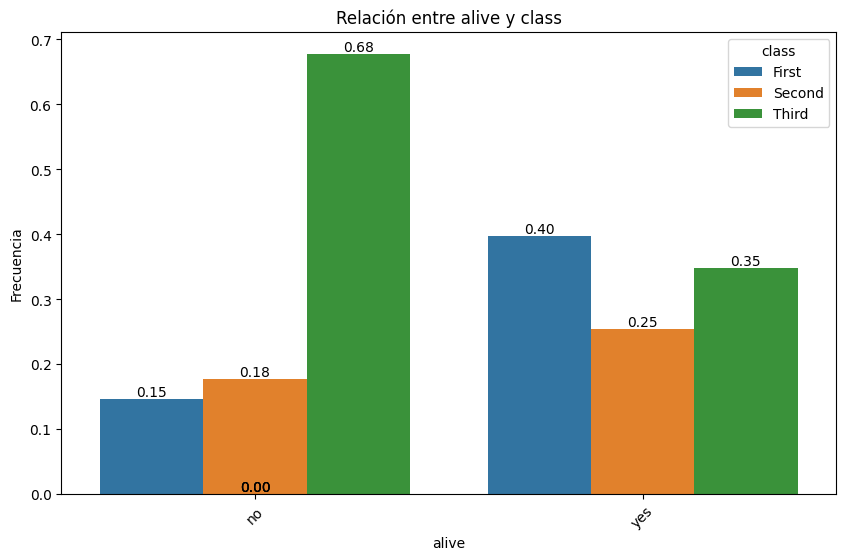

In [20]:
# valores relativos entre alive y class:
plot_categorical_relationship_fin(df_titanic_2, "alive","class", relative_freq = True, show_values = True)

3. ¿De qué ciudad sobrevivieron más personas?
- Sobrevivieron más personas de Southampton, un total de 219 personas.

¿Y porcentualmente de que ciudad sobrevivieron más personas? 
- Igualmente, esto corresponde a un 64% de sobrevivientes de Southampton.

¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
- Sí, ya que cumplen el mismo orden en ciudades en cuanto a supervivientes, que para los fallecidos, pero no en cuanto a sus valores como tal, son dispares:
    - 64% sobrevivientes y un 78% de fallecidos eran de Southampton.
    - 27% de sobrevivientes frente a 14% de fallecidos eran de Cherbourg.
    - 9% de sobrevivientes y 9% de fallecidos eran de Queenstown.


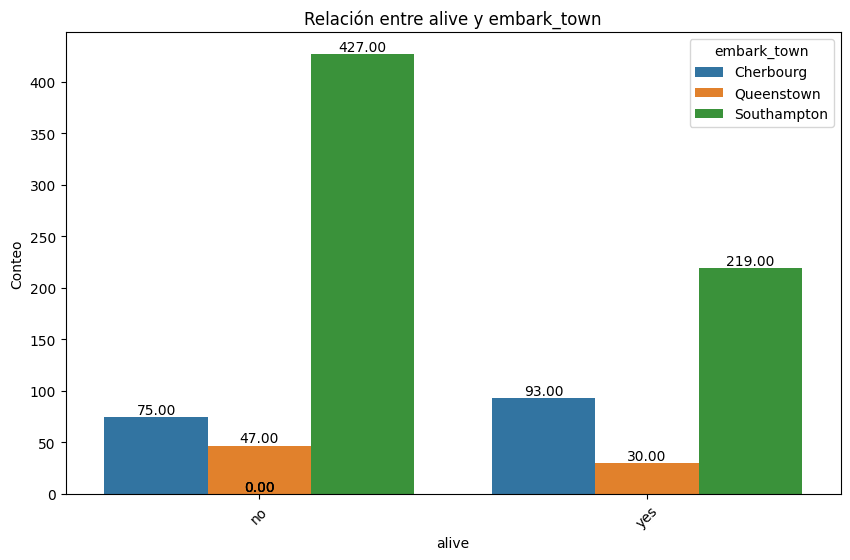

In [ ]:
# Para ello, veamos las absolutas entre alive y embark_town:
plot_categorical_relationship_fin(df_titanic_2, "alive","embark_town", show_values= True)

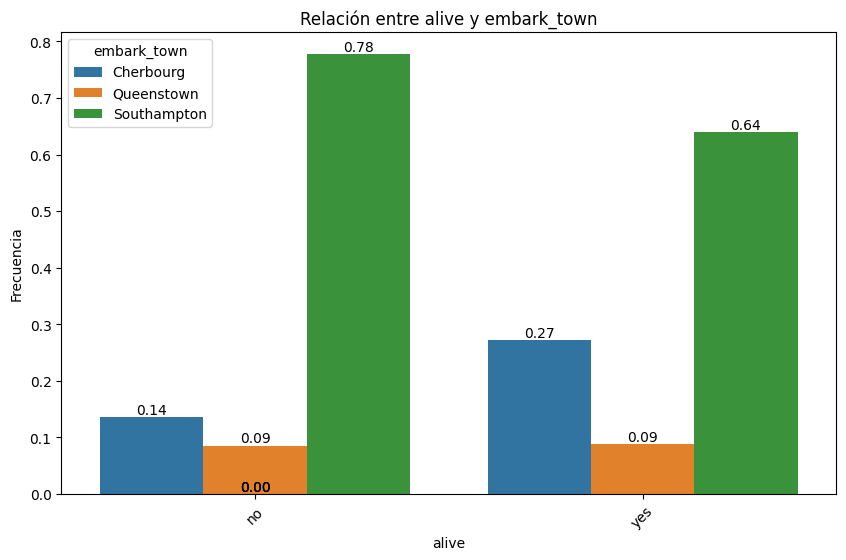

In [22]:
# y sus valores relativos:
plot_categorical_relationship_fin(df_titanic_2, "alive","embark_town", relative_freq = True, show_values = True)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento? 
- En este caso, cuanto más se pagó, más posibilidades hubo de supervivencia. Casi el doble de posibilidades.

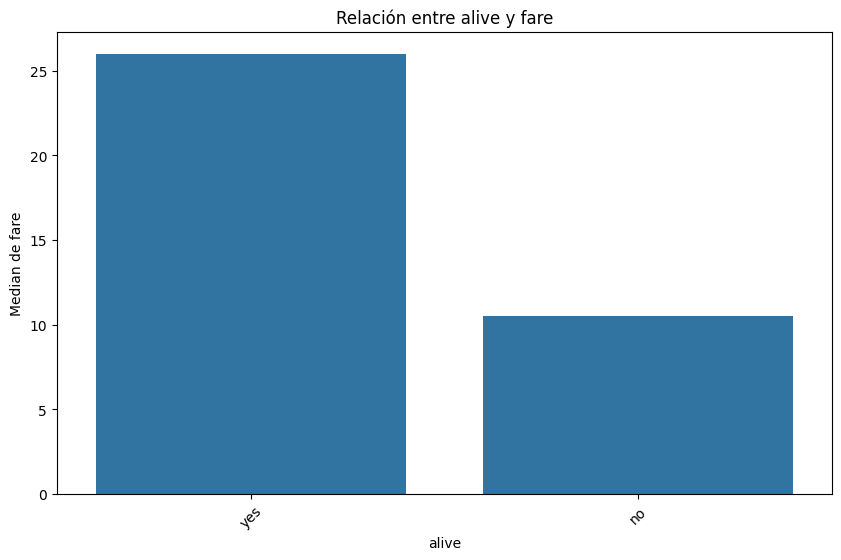

In [25]:
# nos importamos las funciones que usemos para bivariantes combinadas:
from bootcampviztools import plot_categorical_numerical_relationship, plot_grouped_boxplots, plot_grouped_histograms

# veamos las relativas entre alive y fare, teniendo en cuenta
# que 'fare' es una variable numérica y no categórica como las anteriores:

# Veamos diferentes medidas de la variable numérica fare en función
# de los valores de la variable categórica alive

plot_categorical_numerical_relationship(df_titanic_2,"alive","fare", measure = "median")

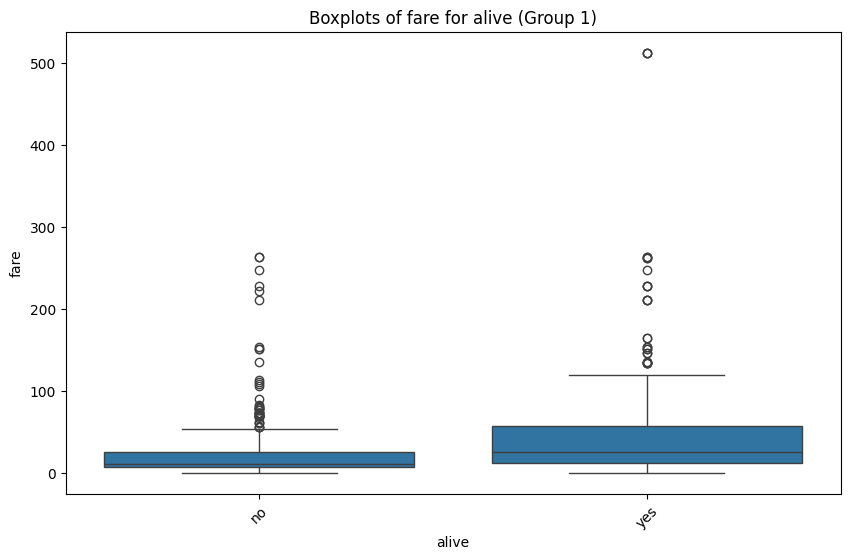

In [27]:
# Veamos los outliers:
plot_grouped_boxplots(df_titanic_2,"alive","fare")


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué?
- Localizamos a los pasajeros que no pagaron nada, vemos que tienen en común que eran todos hombres adultos, iban solos y embarcaron en Southampton. Tal vez los de primera clase les regalaron el billete, pero los de segunda y tercera clase consiguieron subir sin que lo supiera nadie más. Jack, ¿estabas tú entre ellos?

 ¿Qué ocurrió con la persona que más dinero se dejó?
 - Que sobrevivió. De hecho, fueron 3 personas las que pagaron el fee más alto (512.3292): fueron 2 hombres y 1 mujer que embarcaron en primera clase, desde Cherbourg. Dos de ellos iban solos: el tercero iba con un familiar más.

In [32]:
# vamos a localizar los que no pagaron nada
df_titanic_2.loc[df_titanic_2["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36,0.0,Third,man,True,Southampton,no,True,0
263,male,40,0.0,First,man,True,Southampton,no,True,0
271,male,25,0.0,Third,man,True,Southampton,yes,True,0
277,male,29,0.0,Second,man,True,Southampton,no,True,0
302,male,19,0.0,Third,man,True,Southampton,no,True,0
413,male,29,0.0,Second,man,True,Southampton,no,True,0
466,male,29,0.0,Second,man,True,Southampton,no,True,0
481,male,29,0.0,Second,man,True,Southampton,no,True,0
597,male,49,0.0,Third,man,True,Southampton,no,True,0
633,male,29,0.0,First,man,True,Southampton,no,True,0


In [ ]:
# y vamos a agruparlos por clases:
df_titanic_2.loc[df_titanic_2["fare"] == 0].groupby("class").size()

class
First     5
Second    6
Third     4
dtype: int64

In [ ]:
# ahora buscamos a la persona que más dinero pagó:
df_titanic_2["fare"].max()


np.float64(512.3292)

In [41]:
# pero queremos ver toda la columna entera:
df_titanic_2.loc[df_titanic_2["fare"] == df_titanic_2["fare"].max()]


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35,512.3292,First,man,True,Cherbourg,yes,True,0


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

- En cuanto a supervivencia, sí. Quienes más pagaron y sobrevivieron, salieron desde Cherbourg.

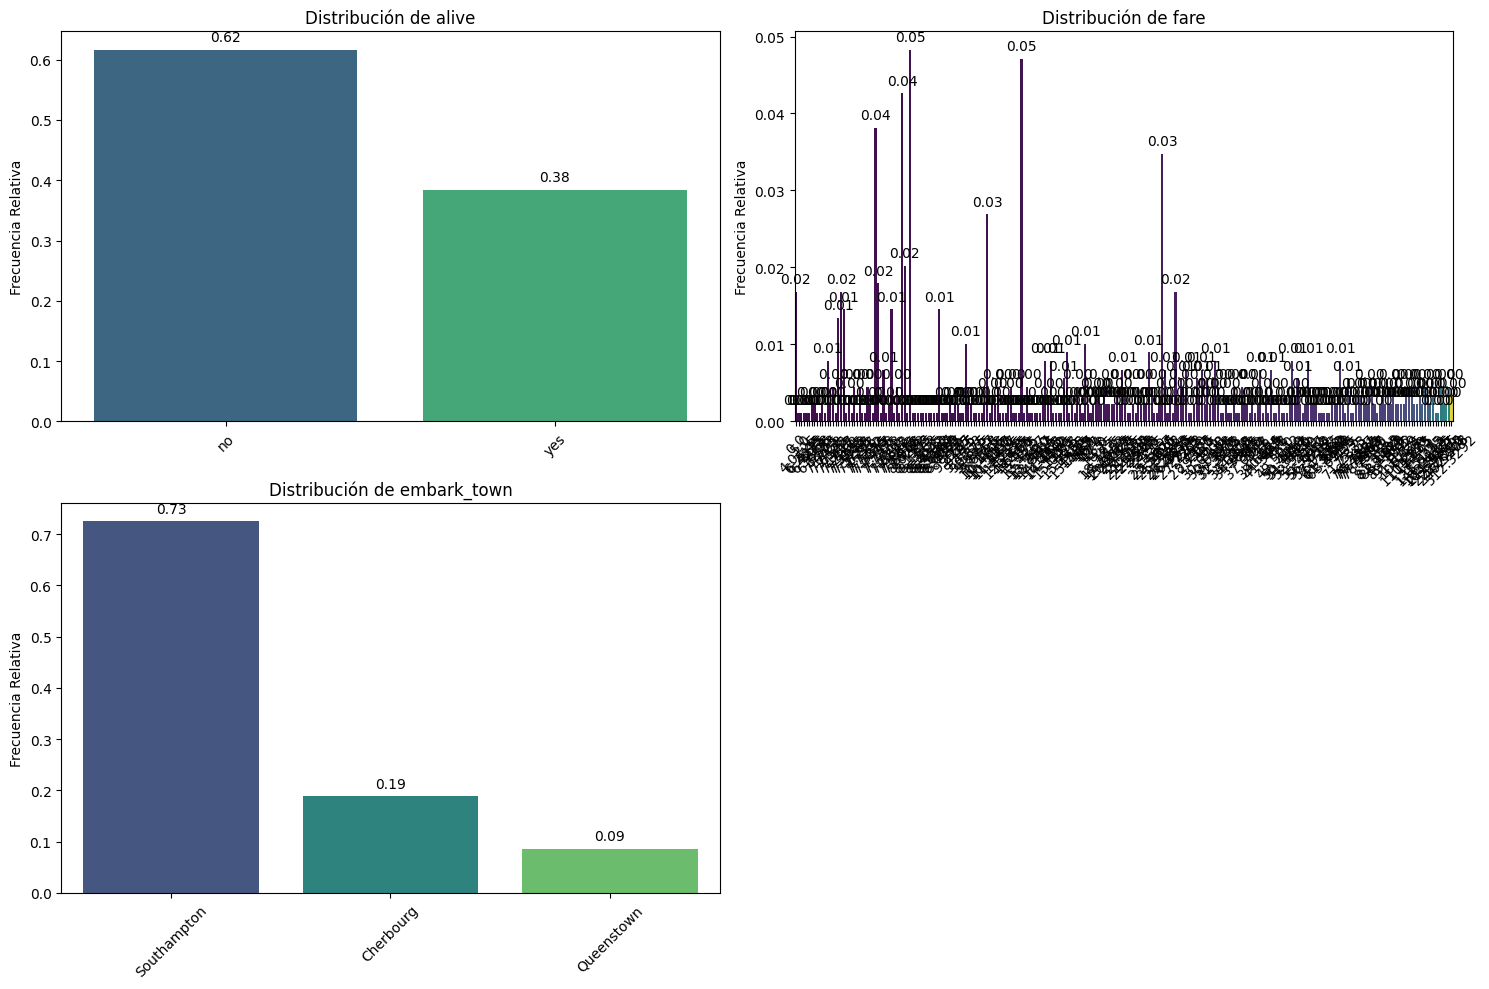

In [ ]:
# Veamos las tres variables juntas, la principal siendo alive, seguida de fare y embark_town:
# pinto primero todos los valores juntos:
pinta_distribucion_categoricas(df_titanic_2,["alive","fare","embark_town"], relativa= True, mostrar_valores= True)

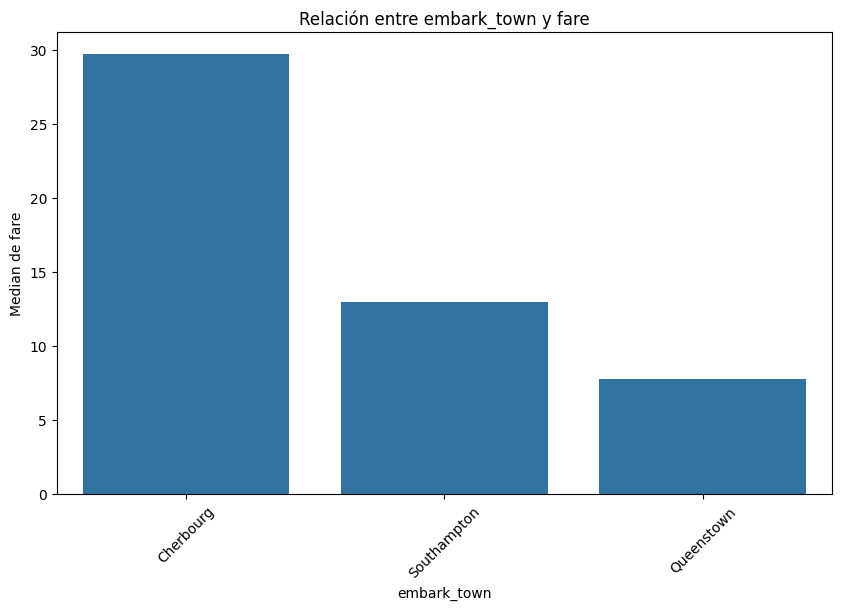

In [48]:
# luego escojo la variable principal y las analizo por partes
# tengo en cuenta que en esta, hay una variable numérica, fare:
plot_categorical_numerical_relationship(df_titanic_2,"embark_town","fare", measure = "median")

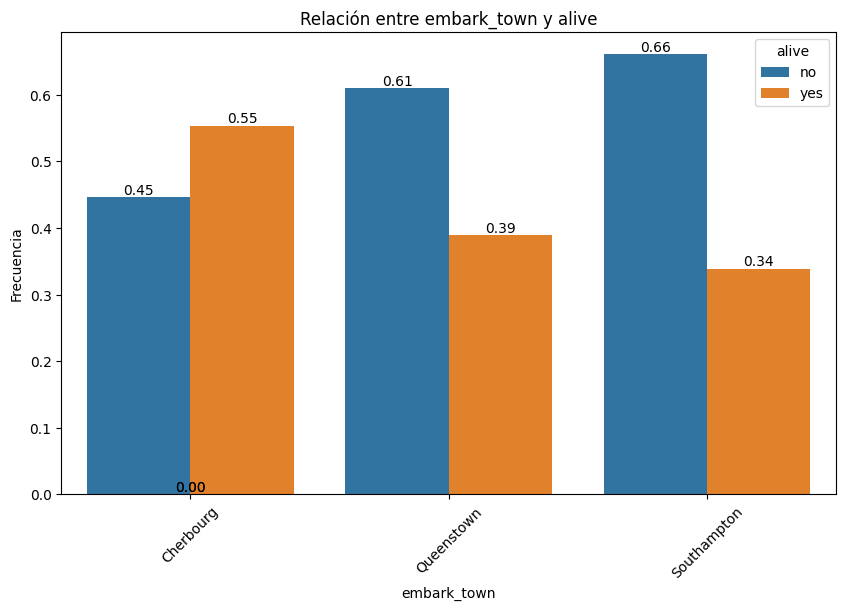

In [45]:
# luego escojo la variable principal y vemos las otras dos:
plot_categorical_relationship_fin(df_titanic_2,"embark_town","alive", relative_freq= True, show_values= True)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
En términos absolutos y reltivos, sobrevivieron más los de primera clase, de alrededor de 30 años aprox.

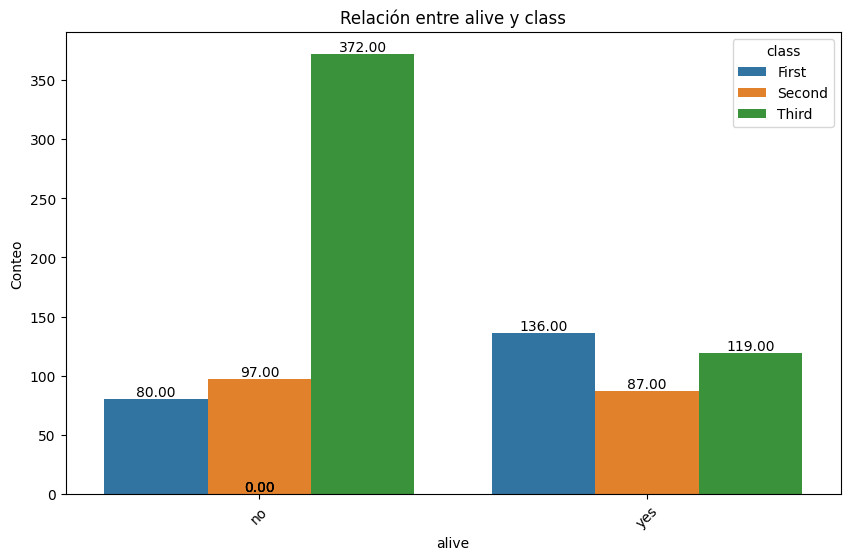

In [54]:
# Veamos sus frecuencias absolutas, primero alive y class:
plot_categorical_relationship_fin(df_titanic_2, "alive","class", show_values= True)

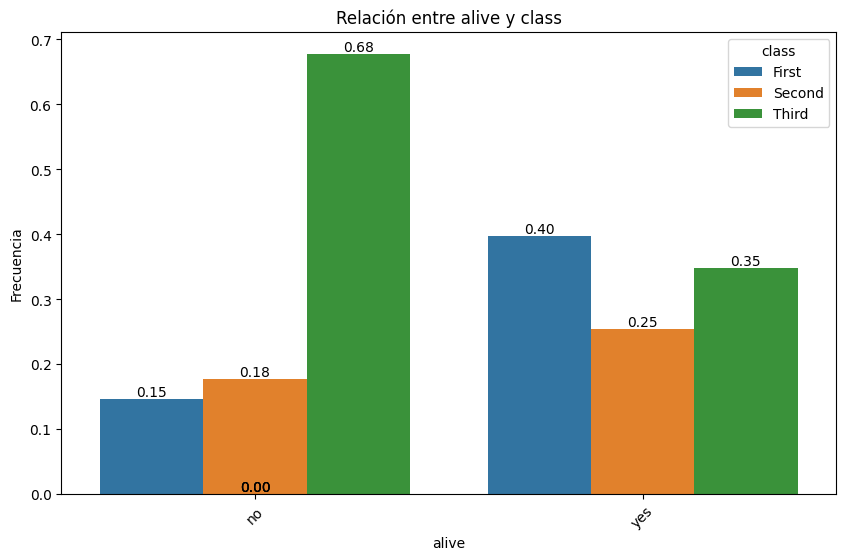

In [ ]:
# y sus frecuencias relativas
plot_categorical_relationship_fin(df_titanic_2,"alive","class", relative_freq= True, show_values= True)

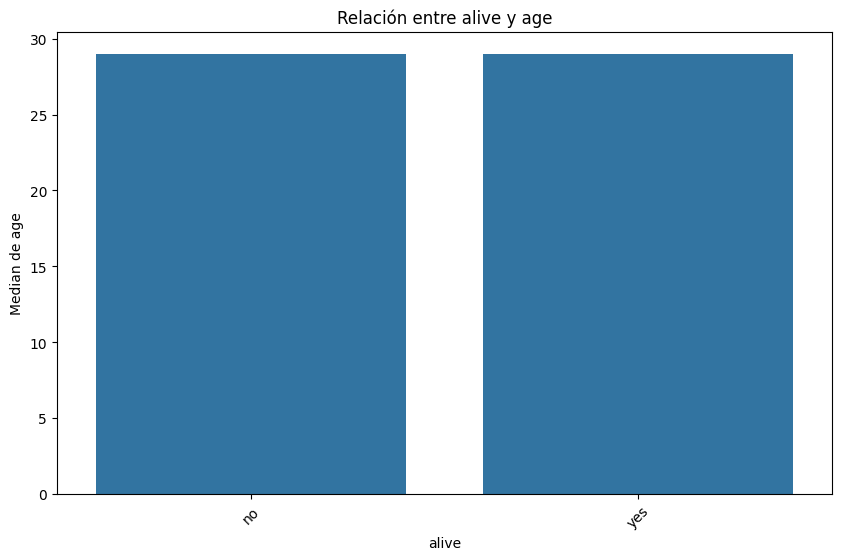

In [58]:
# ahora, las absolutas:
plot_categorical_numerical_relationship(df_titanic_2, "alive","age",measure="median") # Utilizando mediana

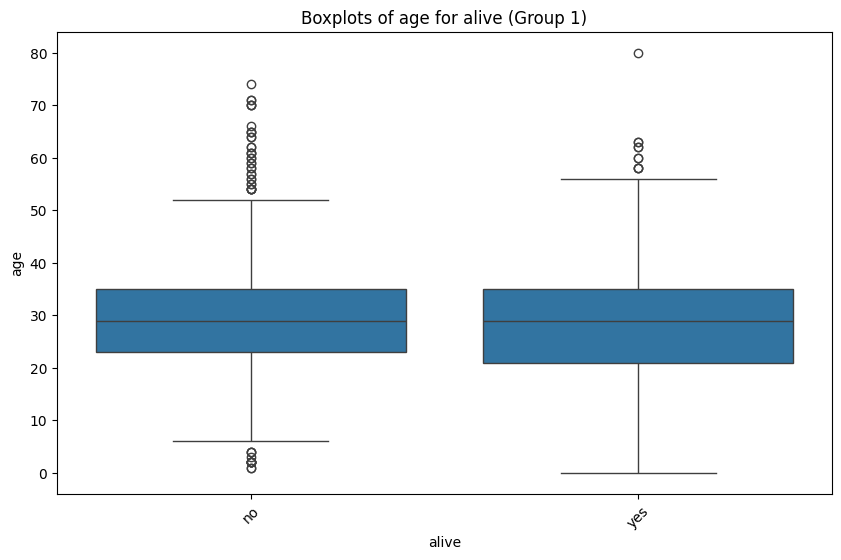

In [52]:
plot_grouped_boxplots(df_titanic_2,"alive","age")
# vamos a usar los diagramas de caja:

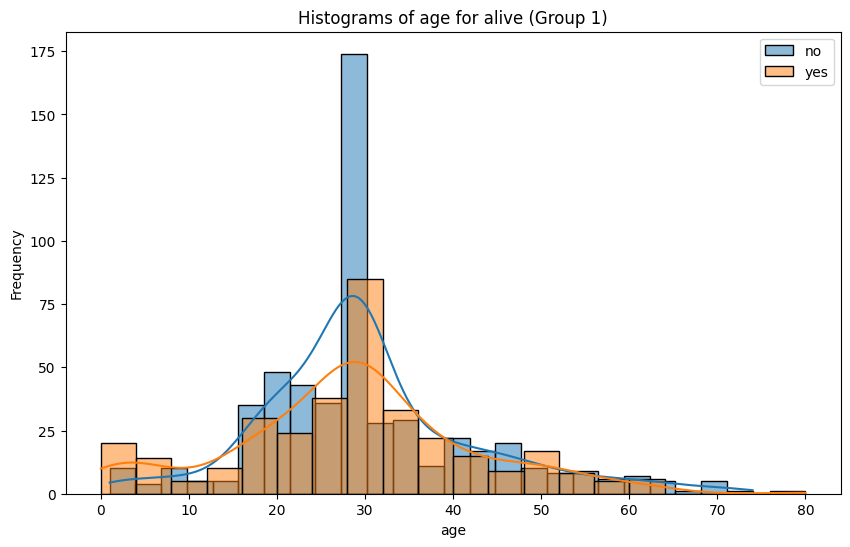

In [59]:
# y los histogramas:
plot_grouped_histograms(df_titanic_2,"alive", "age", 2)


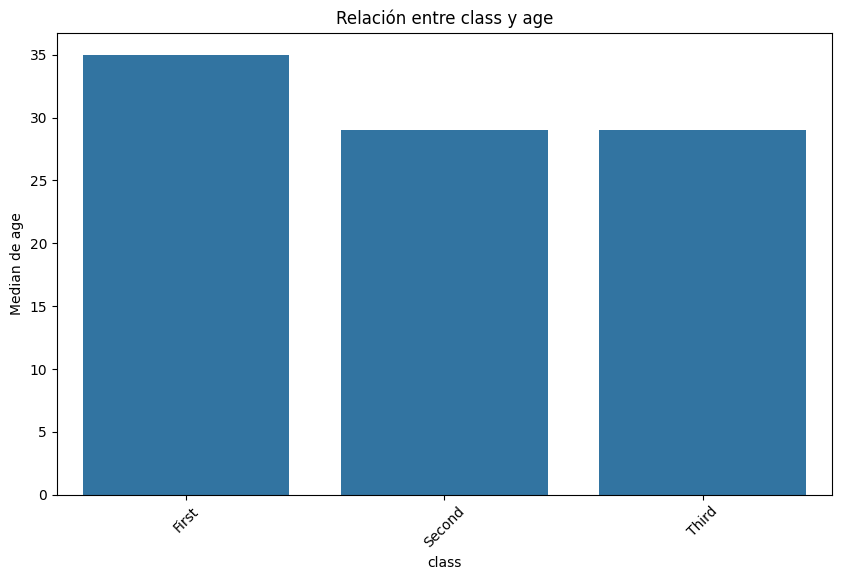

In [60]:
# y entre clase y age:
plot_categorical_numerical_relationship(df_titanic_2, "class","age",measure="median") # Utilizando mediana

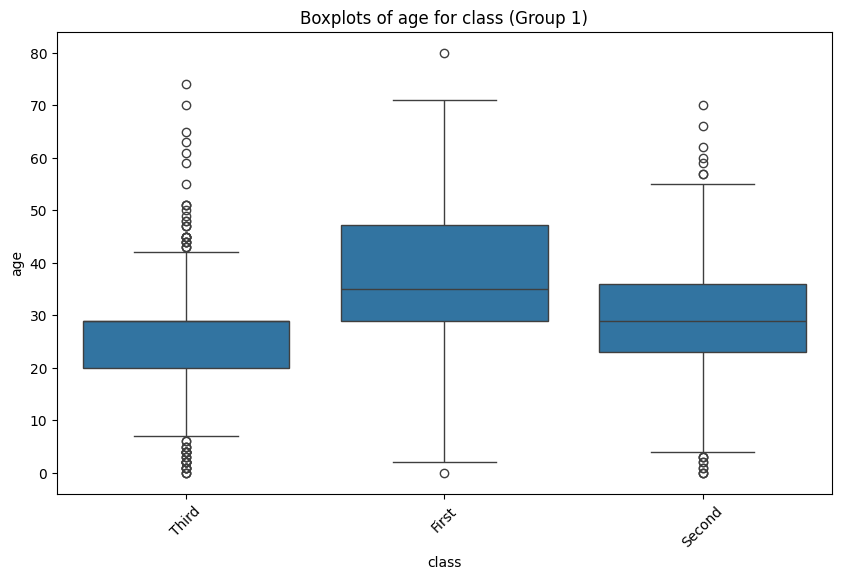

In [61]:
plot_grouped_boxplots(df_titanic_2,"class","age")


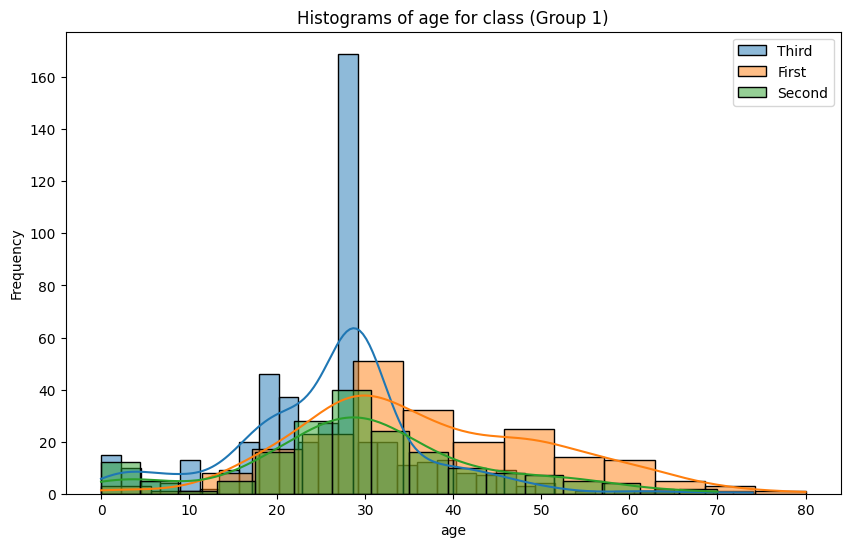

In [63]:
plot_grouped_histograms(df_titanic_2,"class", "age", 3)


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?
- que no necesariamente el haber pagado mucho dinero por el billete, te aseguraba sobrevivir. Hay más sobrevivientes en el primer tramo de fare, entre 0 y 100, y también se concentran entre los 20 y 40 años.


In [65]:
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

In [ ]:
# vamos a usar la variable categórica alive para dividir el análisis en 2,
# si alive yes o no; y las bivariantes numéricas age y fare:
col_directora = "alive"
col_1 = "age"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic_2[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic_2.loc[df_titanic_2[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada fare la distribución de age

Respuesta no:


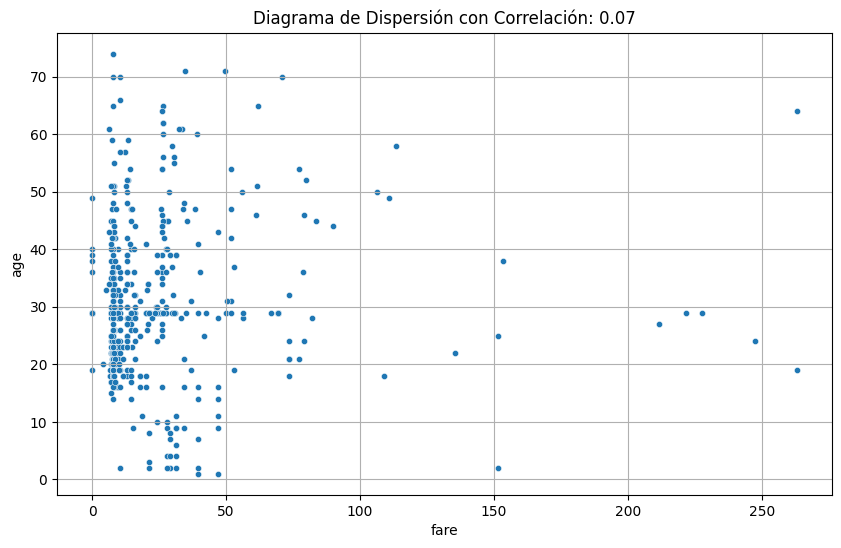

Respuesta yes:


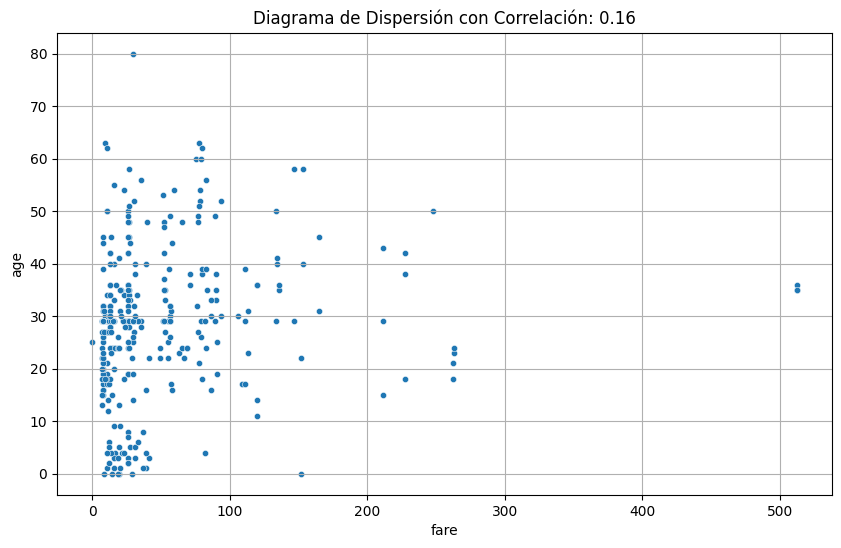

In [69]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?